In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('titanic.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

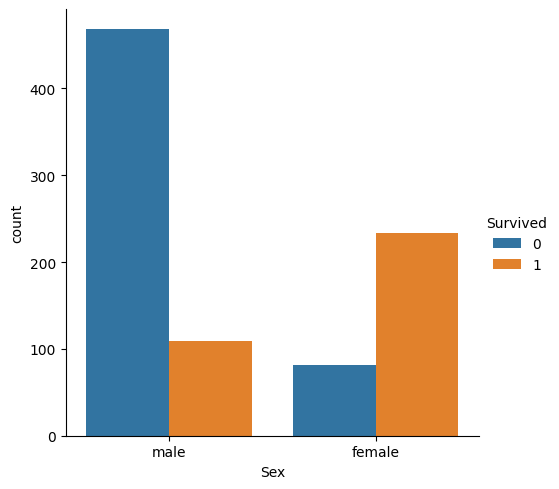

In [ ]:
sns.catplot(x="Sex" , hue="Survived" , kind="count",data=df)

In [ ]:
group=df.groupby(['Pclass','Survived'])
group

In [ ]:
pclass_survived=group.size().unstack()

In [ ]:
pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

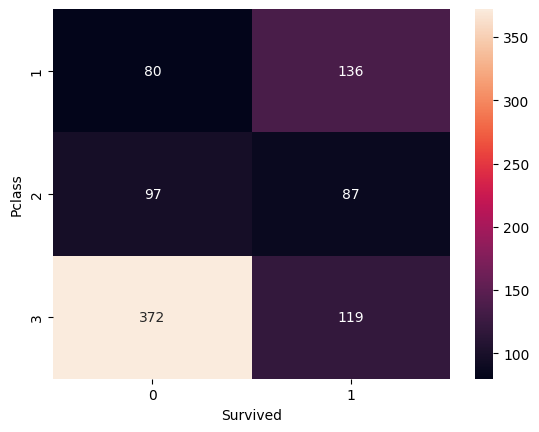

In [ ]:
#count Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived,annot=True,fmt="d")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

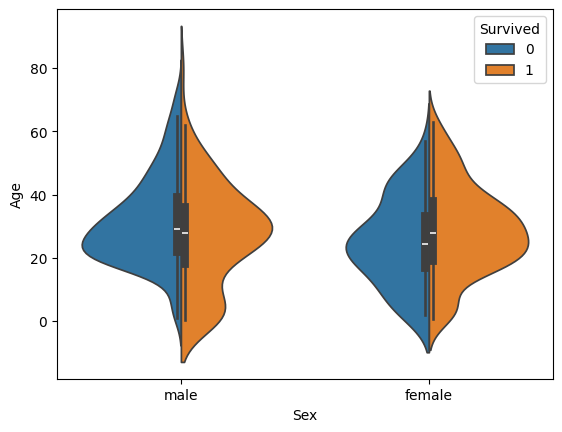

In [ ]:
#Violinplot Displays distribution of data
#across all levels of a category
sns.violinplot(x="Sex",y="Age",hue="Survived",data=df,split=True)

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

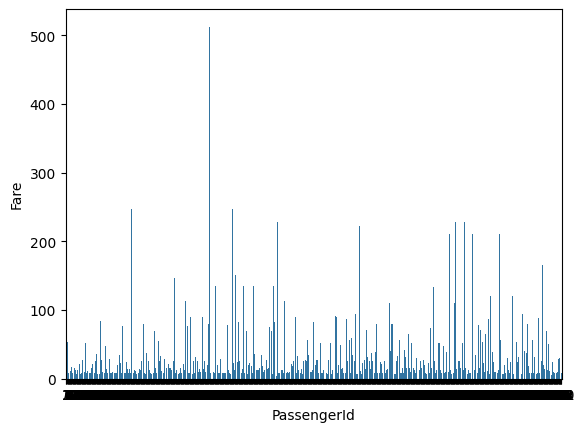

In [ ]:
sns.barplot(x=df['PassengerId'],y=df['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='PassengerId'>

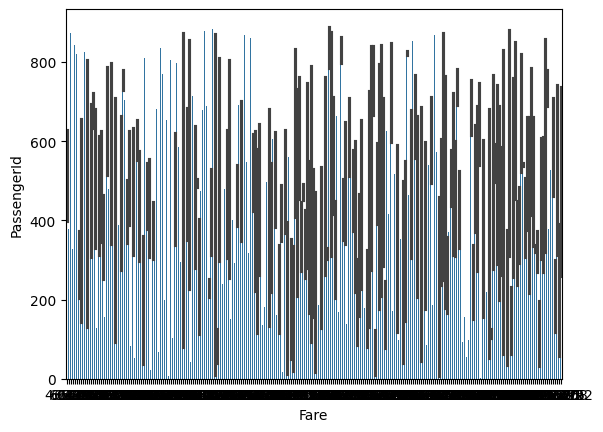

In [ ]:
sns.barplot(x=df['Fare'],y=df['PassengerId'])

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

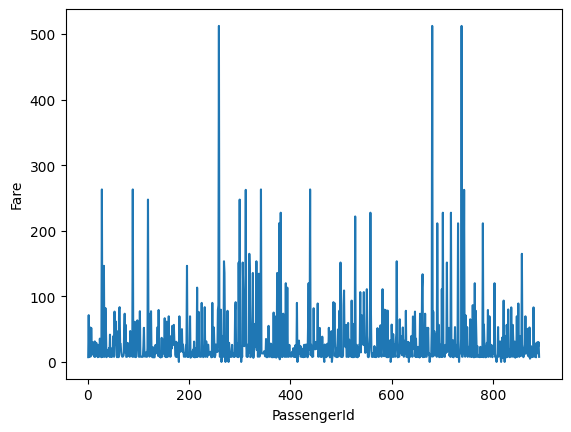

In [ ]:
sns.lineplot(x=df['PassengerId'],y=df['Fare'])

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

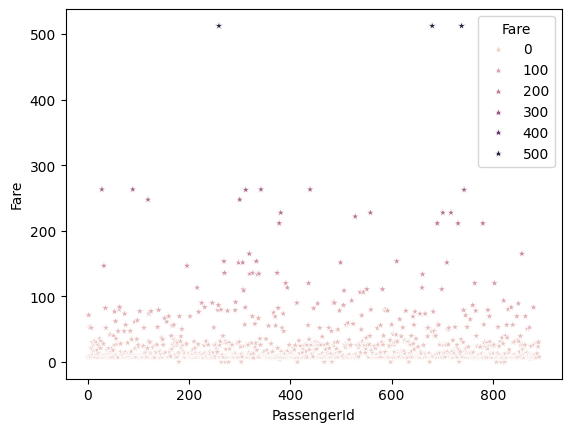

In [ ]:
sns.scatterplot(x=df['PassengerId'],y=df['Fare'],marker='*',hue=df['Fare'])

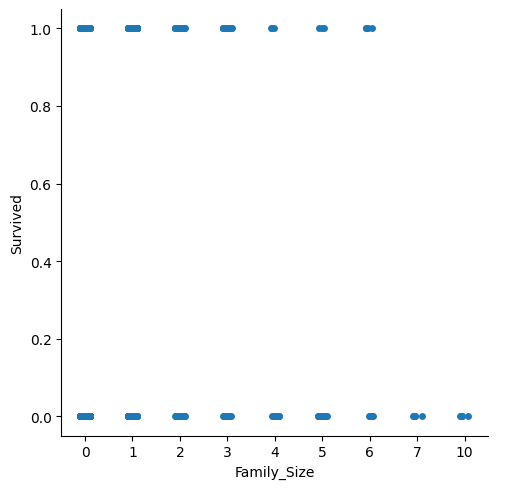

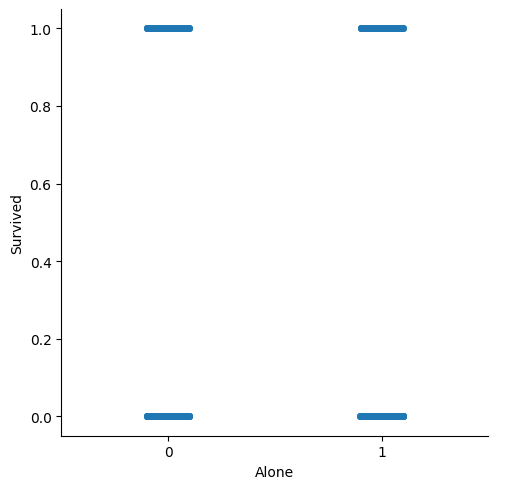

In [ ]:
# Adding a column Family_Size
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']

# Adding a column Alone
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.catplot(x ='Family_Size', y ='Survived', data = df)

# Factorplot for Alone
sns.catplot(x ='Alone', y ='Survived', data = df)


<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

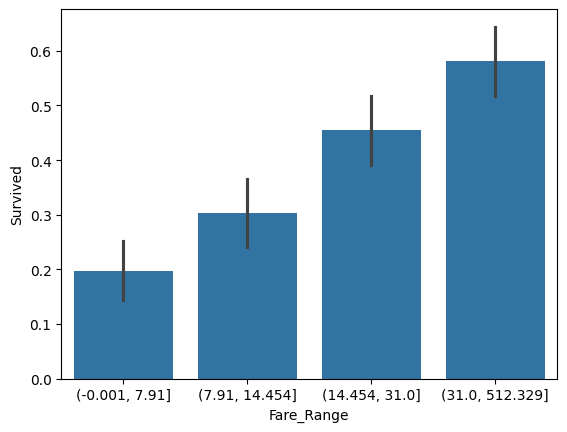

In [ ]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived', data = df)

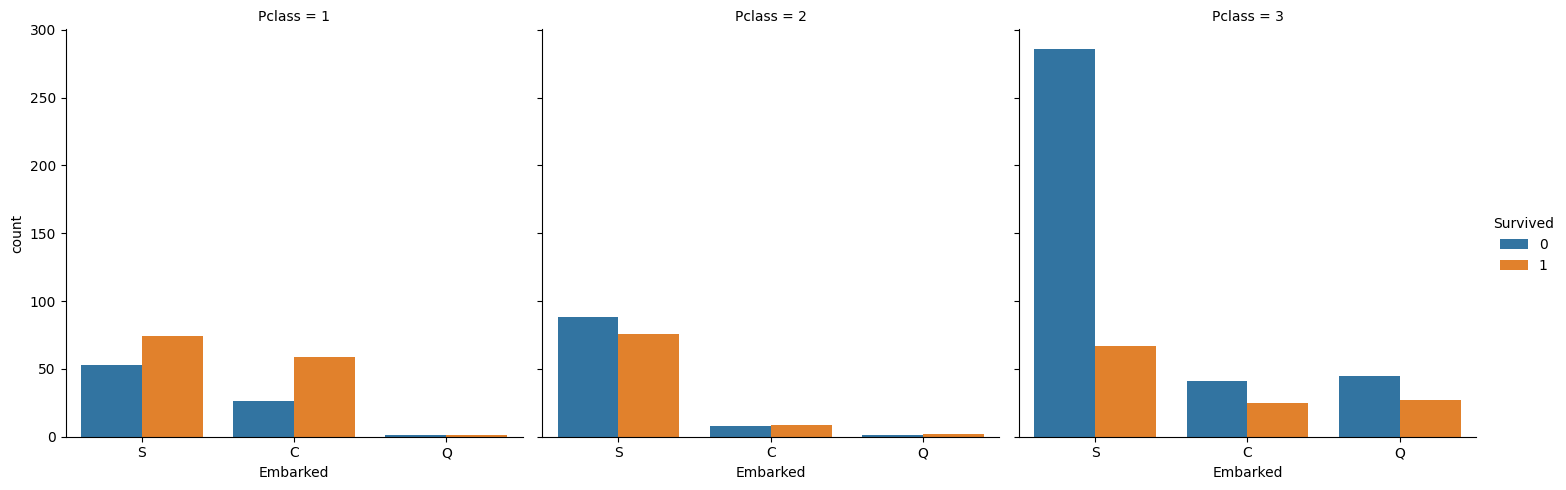

In [ ]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = df)

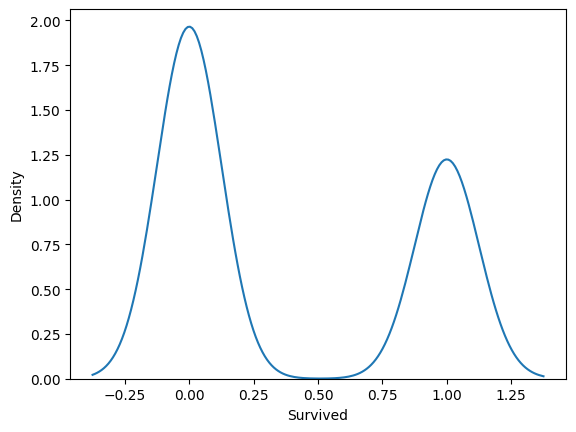

In [ ]:
res=sns.kdeplot(df['Survived'])
plt.show()

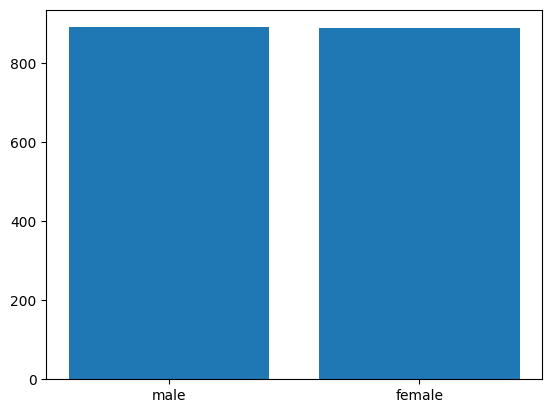

In [ ]:
plt.bar(df['Sex'],df['PassengerId'])
plt.show()

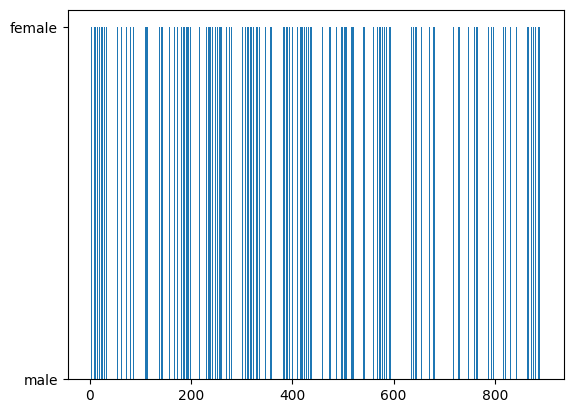

In [ ]:
plt.bar(df['PassengerId'],df['Sex'])
plt.show()

C:\Users\sai\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived'>

C:\Users\sai\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


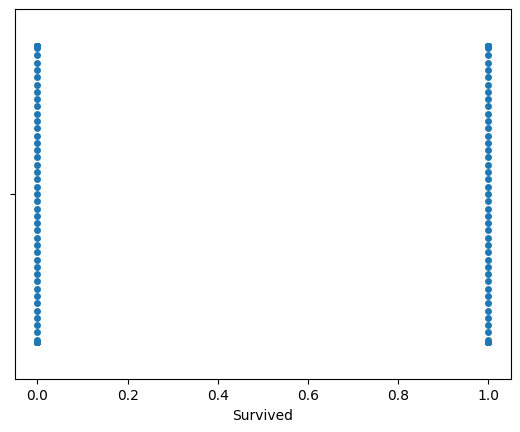

In [ ]:
sns.swarmplot(data=df,x=df['Survived'])

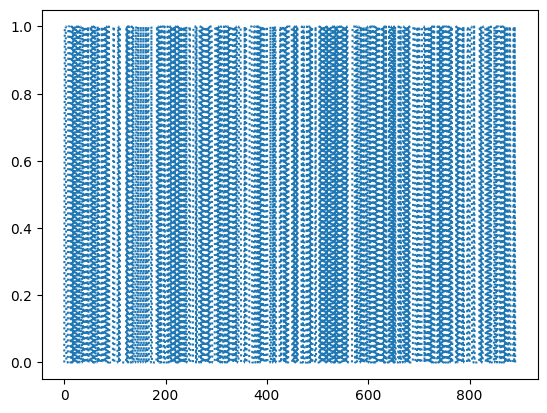

In [ ]:
plt.plot(df['Survived'],linestyle='dotted')

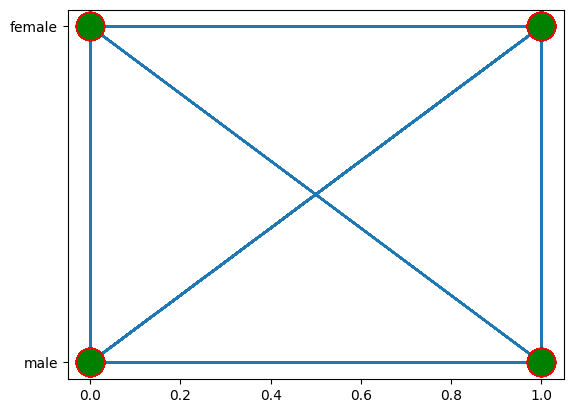

In [ ]:
plt.plot(df['Survived'], df['Sex'], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.show()

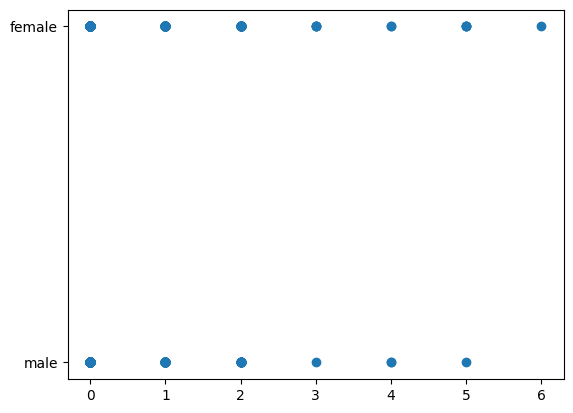

In [ ]:
plt.scatter(df['Parch'], df['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

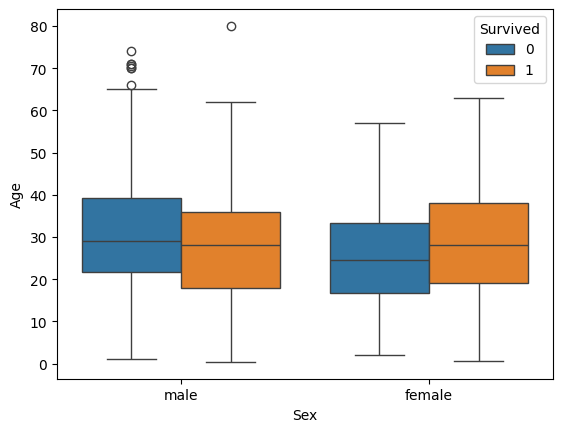

In [ ]:
sns.boxplot(x=df['Sex'],y=df['Age'],hue=df['Survived'])

<AxesSubplot:>

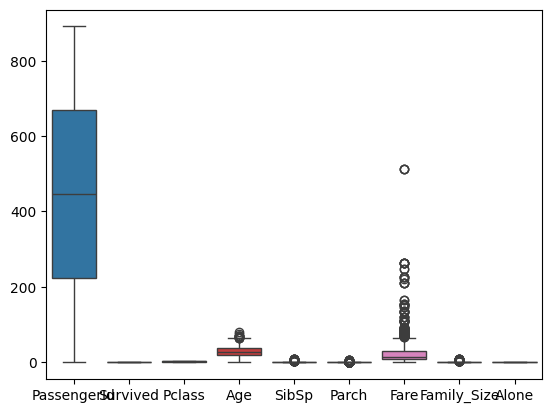

In [ ]:
sns.boxplot(df)

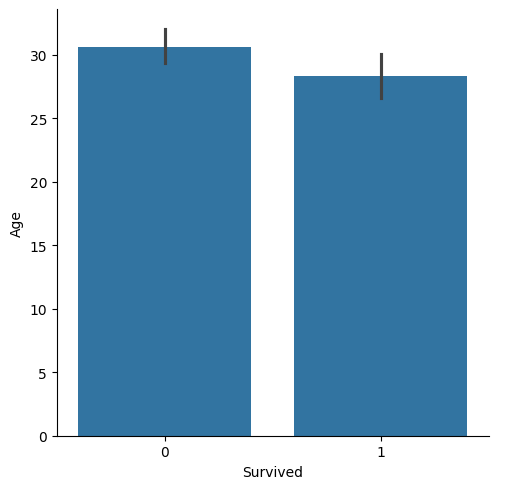

In [ ]:
sns.catplot(data=df,kind="bar",x="Survived",y="Age")

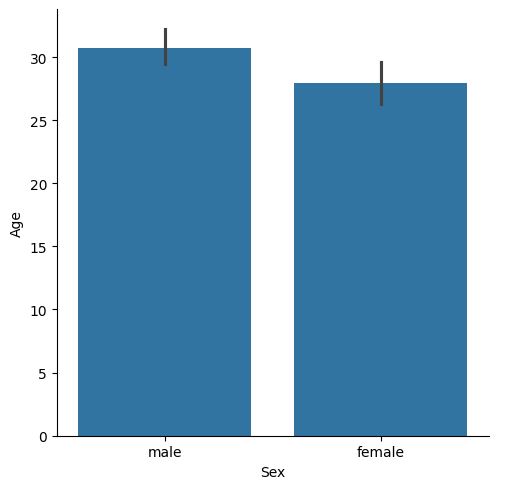

In [ ]:
sns.catplot(data=df,kind="bar",x="Sex",y="Age")


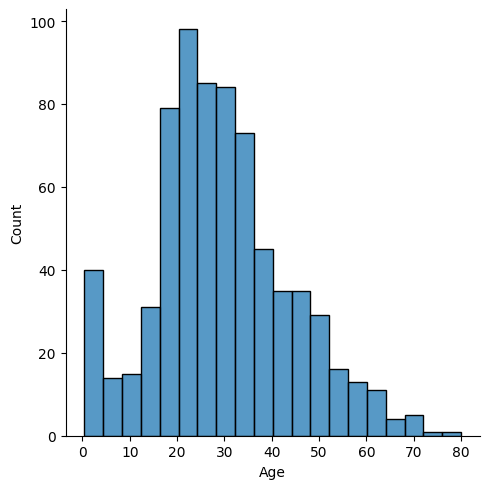

In [ ]:
sns.displot(data=df,x="Age")


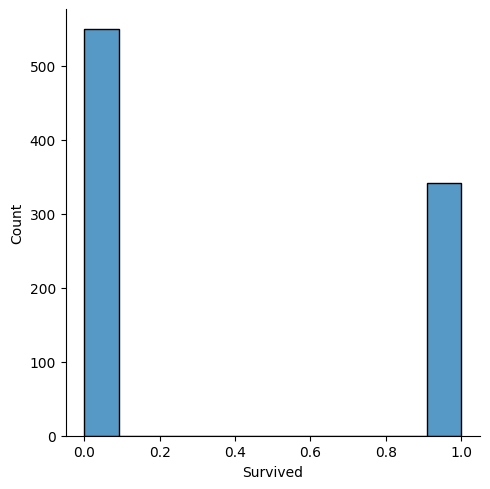

In [ ]:
sns.displot(data=df,x="Survived")

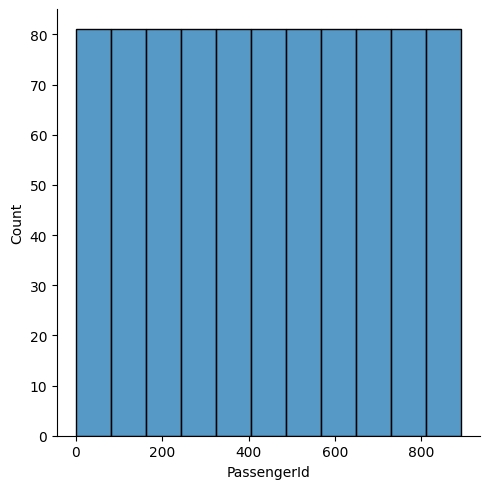

In [ ]:
sns.displot(data=df,x="PassengerId")